# EDA & Data Preprocessing on Google App Store Rating Dataset.

### 1. Import required libraries and read the dataset

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [118]:
data = pd.read_csv('Apps_data+(1).csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [119]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [120]:
data.shape

(10841, 13)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [122]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [123]:
data.describe(include="O").T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


###### 1. The Rating column only is float data type, rest all are object data type
###### 2. App,Category,Reviews,Size etc are categorical values we have to convert them to numerical value for our model building 

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [124]:
data.duplicated().sum()

483

In [125]:
data.drop_duplicates(inplace=True)

In [126]:
data.duplicated().sum()

0

###### 1. There were 483 duplicates present in dataset
###### 2. All Duplicates are now dropped

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [127]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

##### There is a invalid category 1.9 which should be removed.

In [128]:
data = data.drop(data[data['Category'] == '1.9'].index)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [129]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

##### There is a invalid category 1.9 is dropped.

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [130]:
 data['Rating'].isnull().sum()

1465

In [131]:
data.dropna(subset=['Rating'], inplace=True)

In [132]:
 data['Rating'].isnull().sum()

0

###### All missing values are dropped

In [133]:
data['Rating_category'] = np.where(data['Rating'] > 3.5, 'High', 'Low')

In [134]:
data['Rating_category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8892, dtype: object

In [135]:
data['Rating_category'].value_counts()

High    8012
Low      880
Name: Rating_category, dtype: int64

###### New column Rating Category is created where i.e 8012 Highs and 880 Lows 

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [136]:
data['Rating_category'].value_counts()

High    8012
Low      880
Name: Rating_category, dtype: int64

<BarContainer object of 2 artists>

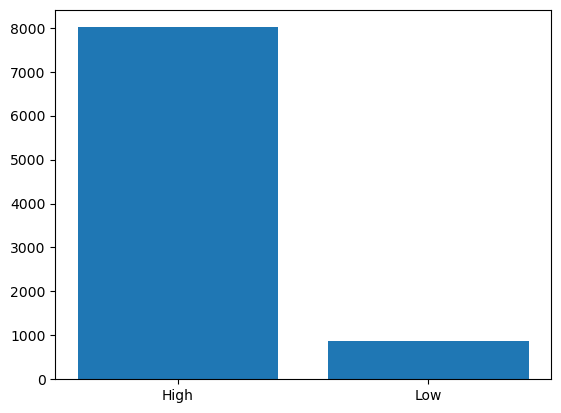

In [137]:
rating_counts = data['Rating_category'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)

######  The distribution of the 'Rating_category' column shows that there are 8012 ratings categorized as 'High' and 880 ratings categorized as 'Low'.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [138]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

<Axes: >

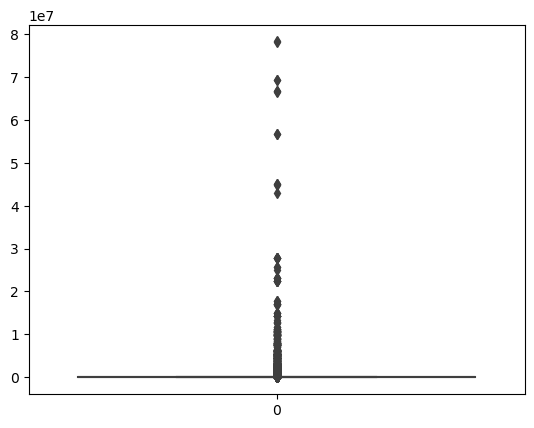

In [139]:
sns.boxplot(data['Reviews'])

In [140]:
data['Reviews'] = np.log1p(data['Reviews'])

<Axes: >

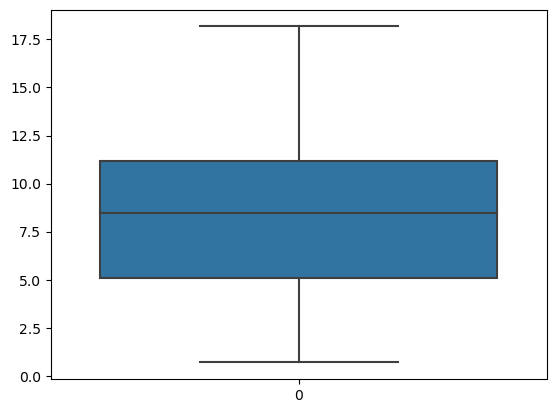

In [141]:
sns.boxplot(data['Reviews'])

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [142]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [143]:
data = data[data['Size'] != 'Varies with device']

In [144]:
def convert(entry):
        if entry[-1] == 'k':
            new_entry = float(entry.replace('k',''))*1000
        else:
            new_entry = float(entry.replace('M',''))*1000000
        return new_entry

In [145]:
data['Size'] = data['Size'].apply(lambda x : convert(x))

In [146]:
data["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [147]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [148]:
data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','')

In [149]:
data['Installs'] = data['Installs'].astype(float)

In [150]:
data['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10833        1000.0
10834         500.0
10836        5000.0
10837         100.0
10840    10000000.0
Name: Installs, Length: 7424, dtype: float64

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [151]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [152]:
data['Price'] = data['Price'].str.replace('$', '')

In [153]:
data['Price'] = data['Price'].astype(float)

In [154]:
data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [155]:
data = data.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [156]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000.0,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000.0,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8700000.0,5000000.0,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,25000000.0,50000000.0,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,2800000.0,100000.0,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000.0,1000.0,Free,0.0,Everyone,High
10834,FAMILY,2.079442,2600000.0,500.0,Free,0.0,Everyone,High
10836,FAMILY,3.663562,53000000.0,5000.0,Free,0.0,Everyone,High
10837,FAMILY,1.609438,3600000.0,100.0,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [157]:
data.dtypes

Category            object
Reviews            float64
Size               float64
Installs           float64
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

In [158]:
lc= LabelEncoder()
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col] = lc.fit_transform(list(df[col]))

In [159]:
categorical_to_numeric(data)

In [160]:
data.dtypes

Category             int64
Reviews            float64
Size               float64
Installs           float64
Type                 int64
Price              float64
Content Rating       int64
Rating_category      int64
dtype: object

### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [161]:
y = data[['Rating_category']]
X = data.drop('Rating_category',axis=1)

In [162]:
y.columns

Index(['Rating_category'], dtype='object')

In [163]:
X.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating'],
      dtype='object')

### 15. Split the dataset into train and test.

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=555)

In [165]:
X_train.shape

(5196, 7)

In [166]:
X_test.shape

(2228, 7)

In [167]:
y_train.shape

(5196, 1)

In [168]:
y_test.shape

(2228, 1)

### 16. Standardize the data, so that the values are within a particular range.

In [169]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [172]:
X_train_std

array([[ 1.51899936,  0.74495947, -0.74270989, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [-1.68526555, -0.02729815, -0.72574436, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [-1.19230172, -1.70064624, -0.80208924, ..., -0.28722813,
        -0.06555691,  1.53503175],
       ...,
       [-0.32961501,  1.37063214,  0.17766999, ..., -0.28722813,
        -0.06555691,  2.53153662],
       [ 1.27251744, -1.59035352, -0.89115826, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [-0.32961501,  1.5058418 ,  1.11077401, ..., -0.28722813,
        -0.06555691,  0.53852688]])

In [173]:
X_test_std

array([[-0.69933788, -0.02470339,  2.08629185, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [-1.56202459, -1.17132885, -0.20405439, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [ 1.14927649,  0.77222807, -0.28888202, ..., -0.28722813,
        -0.06555691, -0.45797799],
       ...,
       [ 1.51899936, -1.08826036, -0.87419273, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [-0.69933788, -1.01360933, -0.68757192, ..., -0.28722813,
        -0.06555691, -0.45797799],
       [ 0.40983074, -1.70064624,  0.22008381, ..., -0.28722813,
        -0.06555691, -0.45797799]])